#Q1
Clustering is a technique in machine learning and data analysis where data points are grouped together based on their similarity. The goal is to create clusters or groups of data points that are more similar to each other than to those in other clusters. The basic concept involves partitioning a set of data points into subsets, or clusters, in such a way that points in the same cluster are more similar to each other than to those in other clusters.

Applications:

Customer Segmentation: Grouping customers based on their purchasing behavior.

Document Classification: Clustering similar documents together.

Image Segmentation: Grouping similar pixels in an image.

Anomaly Detection: Identifying unusual patterns in data.

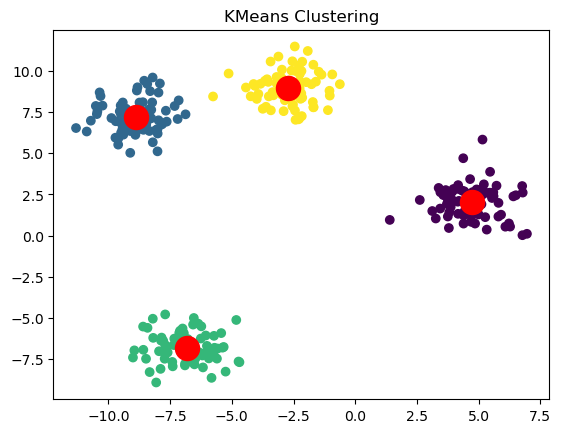

In [2]:
#1
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings('ignore')
# Generating synthetic data
X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Using KMeans for clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.title("KMeans Clustering")
plt.show()

#Q2

DBSCAN is a density-based clustering algorithm that divides data points into dense regions separated by sparser regions. Unlike K-Means, DBSCAN doesn't require the number of clusters as input and can find clusters of arbitrary shapes.

Differences:

K-Means: Assumes clusters of similar sizes and shapes, sensitive to outliers.

Hierarchical Clustering: Builds a hierarchy of clusters, requires specifying the number of clusters.

DBSCAN: Identifies clusters based on the density of data points, can handle irregular shapes, and is less sensitive to outliers.

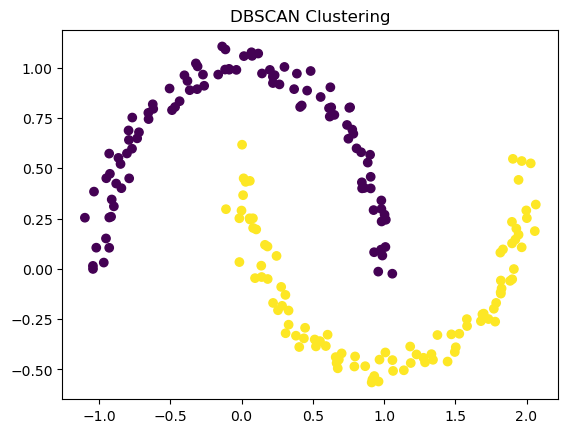

In [3]:
#2
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# Generating synthetic data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN Clustering")
plt.show()

#Q3
Optimal values for epsilon (eps) and minimum points (min_samples) can be determined using techniques like the Elbow Method or Silhouette Score.

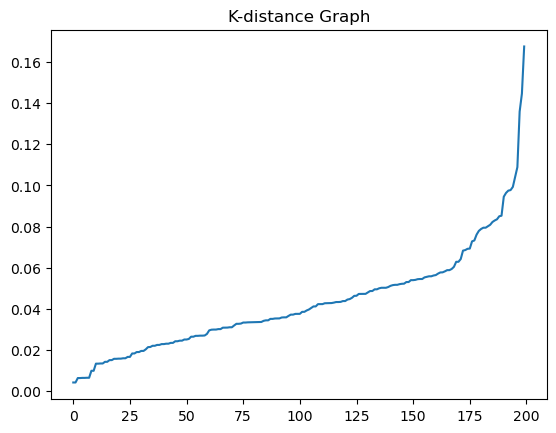

In [4]:
#3
from sklearn.neighbors import NearestNeighbors
import numpy as np

# Calculate the distances of each point to its nearest neighbor
neigh = NearestNeighbors(n_neighbors=2)
distances, _ = neigh.fit(X).kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)
plt.title("K-distance Graph")
plt.show()

#Q4
DBSCAN naturally handles outliers as noise points. Points that do not belong to any dense cluster are labeled as outliers (-1).

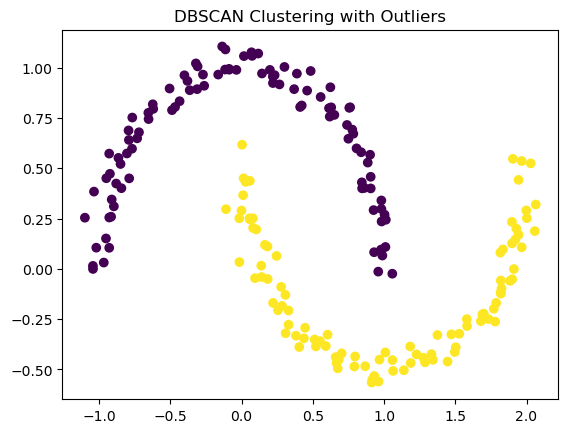

In [5]:
#4
# Visualizing outliers in DBSCAN
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN Clustering with Outliers")
plt.show()

#Q5
DBSCAN: Density-based, doesn't require specifying the number of clusters, handles clusters of arbitrary shapes, robust to outliers.

K-Means: Partitioning method, assumes spherical clusters, sensitive to outliers.

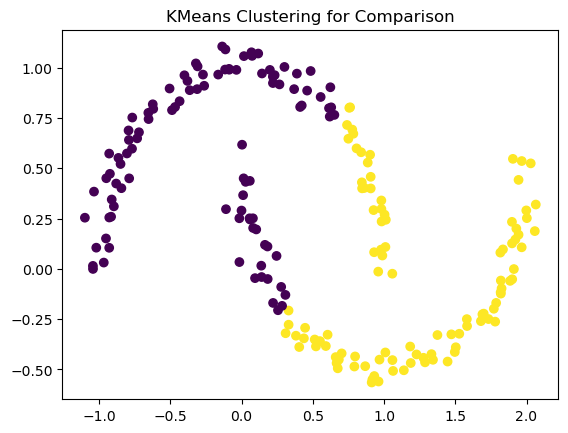

In [6]:
#5
# Visualizing K-Means Clustering for comparison
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)
plt.scatter(X[:, 0], X[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("KMeans Clustering for Comparison")
plt.show()

#Q6
DBSCAN can be applied to datasets with high-dimensional feature spaces, but challenges may arise due to the curse of dimensionality. In high-dimensional spaces, the concept of distance becomes less meaningful, and the density-based nature of DBSCAN might be affected.

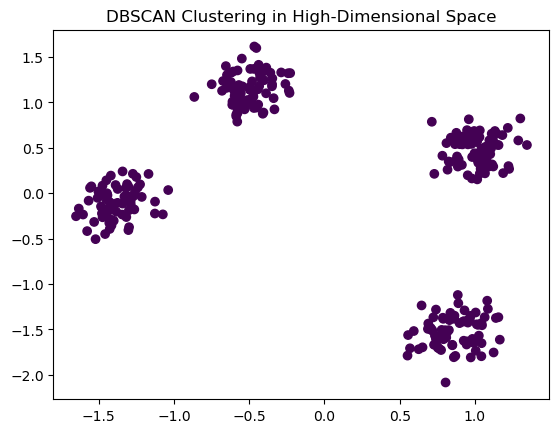

In [7]:
#6
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Generating synthetic high-dimensional data
X, _ = make_blobs(n_samples=300, n_features=50, centers=4, random_state=42)

# Scaling the data
X = StandardScaler().fit_transform(X)

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN Clustering in High-Dimensional Space")
plt.show()

#Q7
DBSCAN can handle clusters with varying densities since it defines clusters based on the local density of points. The min_samples parameter plays a crucial role in identifying clusters with different densities.

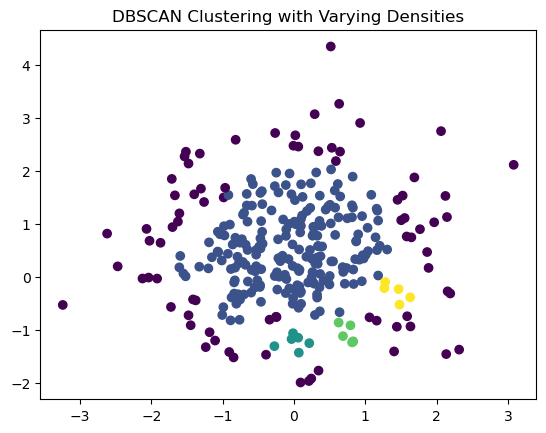

In [9]:
#7
# Generating synthetic data with varying densities
X, _ = make_blobs(n_samples=300, centers=[[0, 0], [0, 0.5], [0, 1]], random_state=42)

# Using DBSCAN for clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Visualizing the clusters
plt.scatter(X[:, 0], X[:, 1], c=dbscan.labels_, cmap='viridis')
plt.title("DBSCAN Clustering with Varying Densities")
plt.show()

#Q8
DBSCAN doesn't have a built-in objective function, but metrics like Silhouette Score and Davies-Bouldin Index can be used to evaluate the quality of clustering.

In [10]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, dbscan.labels_)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.0438113451549061


#Q9
DBSCAN can be used for semi-supervised learning by considering labeled points as seeds. It assigns labels to nearby points, expanding clusters iteratively.

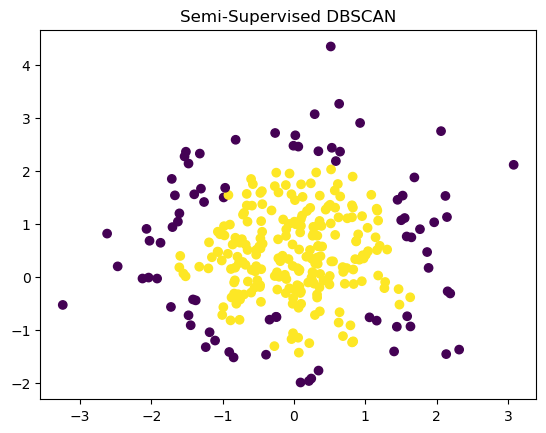

In [11]:
# Semi-supervised DBSCAN
labels_semi = dbscan.labels_
labels_semi[labels_semi != -1] = 1  # Consider labeled points as part of the clusters

plt.scatter(X[:, 0], X[:, 1], c=labels_semi, cmap='viridis')
plt.title("Semi-Supervised DBSCAN")
plt.show()

#Q10
DBSCAN naturally handles noise (outliers), but handling missing values requires preprocessing. One approach is to impute missing values or use techniques like mean imputation.

In [13]:
# Impute missing values
X_with_missing = X.copy()
X_with_missing[0:10, 0] = np.nan  # Example: Adding missing values

# Imputation (using mean as an example)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_with_missing)

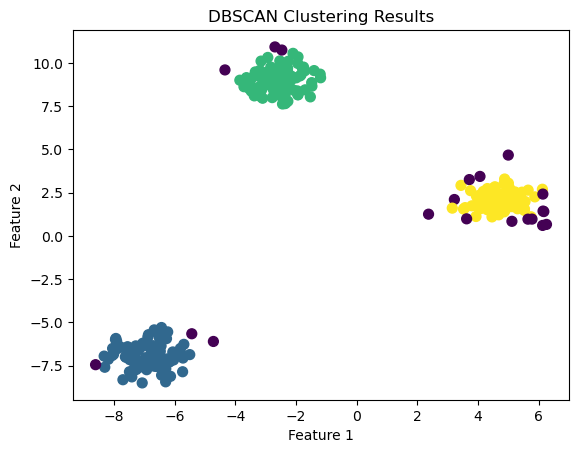

In [15]:
#Q11
#Here's a simple implementation of DBSCAN in Python:

from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

# Create a sample dataset
data, labels = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=0.7)

# Implement DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(data)

# Plot the results
plt.scatter(data[:, 0], data[:, 1], c=clusters, cmap='viridis', s=50)
plt.title('DBSCAN Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

The DBSCAN algorithm is applied to this dataset, and the resulting clusters are visualized using a scatter plot.

Now, let's discuss the parameters of DBSCAN:

eps: The maximum distance between two samples for one to be considered as in the neighborhood of the other.

min_samples: The number of samples (or total weight) in a neighborhood for a point to be considered as a core point.

Interpreting the clusters:

Core Points: Points that have at least min_samples number of points within a distance of eps are considered core points. These are typically the center of the clusters.

Border Points: Points that are within the eps distance of a core point but do not have enough neighbors to be core points themselves.

Noise: Points that are neither core nor border points. They are considered as noise or outliers.